**IMPORT**

In [1]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.options.display.max_columns=None

In [3]:
# %load "function.py"

In [141]:
df=pd.read_pickle("autos_20190708.pkl")

**EDA**

In [142]:
drop_list=df.columns[df.isnull().mean() > 0.20]

In [143]:
df.drop(drop_list, axis=1, inplace=True)

In [144]:
df.shape

(15919, 119)

In [149]:
#df.dropna(thresh=60, inplace=True)

In [145]:
df=df.dropna()

In [146]:
df.shape

(6575, 119)

In [147]:
df.head(4)

,co2_emission,displacement,make,model,body_type,description,hp,km,offer_number,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,body,body_color,gearing_type,inspection_new,price,short_description,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,first_registration,fuel,nr_of_doors,nr_of_seats,type,warranty,url,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres
0,99.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013.0,LR-062483,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,Sedans,Black,Automatic,1,15770,Sportback 1.4 TDI S-tronic Xenon Navi Klima,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),5.0,5.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,99.0,1598.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450.0,AM-95365,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,Sedans,Black,Automatic,0,14640,Sportback 1.6 TDI S tronic Einparkhilfe plus+m...,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,2016-01-01,Diesel (Particulate Filter),4.0,4.0,Used,1,https://www.autoscout24.com//offers/audi-a1-sp...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,109.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200.0,C1626,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,Sedans,Black,Automatic,1,16790,Sportback 1.4 TDI S-Tronic S-Line Ext. admired...,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,2016-01-01,Diesel (Particulate F

**FUEL**

In [10]:
df.fuel.value_counts()

Diesel (Particulate Filter)                2391
Super 95                                   1872
Gasoline                                    915
Diesel                                      791
Regular/Benzine 91                          223
Super E10 95                                191
Super 95 (Particulate Filter)               112
Gasoline (Particulate Filter)                43
Regular/Benzine 91 (Particulate Filter)      26
Regular/Benzine E10 91                        5
Super E10 95 (Particulate Filter)             3
Liquid petroleum gas (LPG)                    1
Biogas                                        1
Super Plus 98                                 1
Name: fuel, dtype: int64

In [148]:
df.loc[(df['fuel']=='Diesel (Particulate Filter)'), 'fuel']='Diesel'
df.loc[((df['fuel']=='Super 95') | (df['fuel']=='Regular/Benzine 91')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Super E10 95') | (df['fuel']=='Super 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Gasoline (Particulate Filter)') | (df['fuel']=='Regular/Benzine 91 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Regular/Benzine E10 91') | (df['fuel']=='Super E10 95 (Particulate Filter)')), 'fuel']='Gasoline'
df.loc[(df['fuel']=='Super Plus 98'), 'fuel']='Gasoline'
df.loc[((df['fuel']=='Biogas') | (df['fuel']=='Liquid petroleum gas (LPG)')), 'fuel']='Biogas/LPG'

In [149]:
df.fuel.value_counts()

Gasoline      3391
Diesel        3182
Biogas/LPG       2
Name: fuel, dtype: int64

In [150]:
df.fuel.nunique()

3

**PRICE**

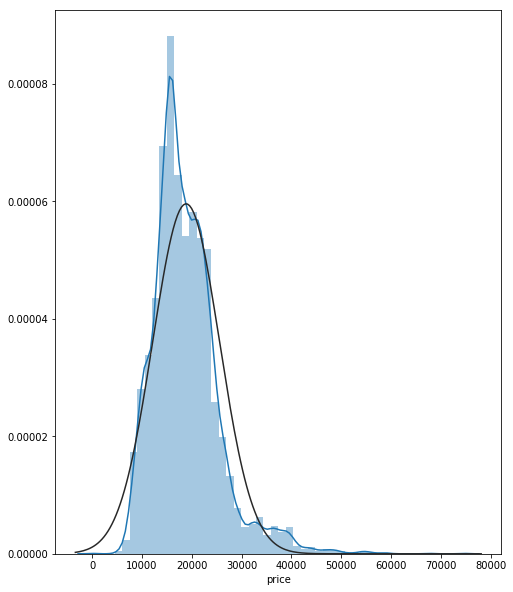

In [151]:
sns.distplot(df.price, fit=norm)

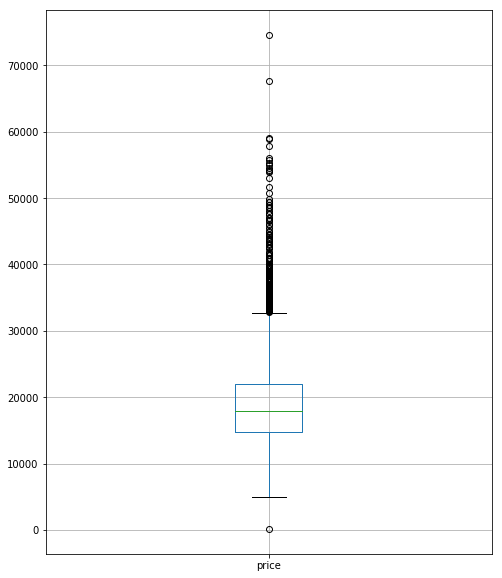

In [152]:
df.boxplot('price')

In [153]:
df.price.sort_values(ascending = True)[:5]

8828      120
8825     4990
13757    5900
13761    5900
13756    5938
Name: price, dtype: int64

In [154]:
df = df.drop([8828])

In [155]:
df.price.sort_values(ascending = True)[:5]

8825     4990
13757    5900
13761    5900
13756    5938
8601     5970
Name: price, dtype: int64

**DROP DOUBLE COLUMNS**

In [156]:
# age and firs registration columns are same
df.drop('first_registration', axis=1, inplace=True)

In [157]:
#body and body_type are same
df.drop(['body_type'], axis=1, inplace=True)

In [159]:
# Let's see if there are still "object" type columns to be converted to numeric
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
offer_number         object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [160]:
df.describe(include = "object")

,make,model,description,offer_number,body,body_color,gearing_type,short_description,fuel,type,url
count,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574,6574
unique,3,7,1,5956,9,12,3,4449,3,5,6574
top,Opel,A3,Sicherheit: Deaktivierung für Beifahrer-Airbag...,UN89904,Sedans,Black,Automatic,SPB 1.6 TDI 116 CV S tronic Sport,Gasoline,Used,https://www.autoscout24.com//offers/audi-a1-sp...
freq,2882,1434,6574,27,3131,1722,3645,35,3390,4613,1


In [161]:
# offer_number has many unique values.(5956). Let's drop it.
df.drop('offer_number', axis=1, inplace=True)

**HEAT MAP**

In [162]:
# designate columns_new that consist of numeric variables.
columns_new=["price", "co2_emission", "km", "consumption_comb",
              "age", "nr_of_doors", "warranty", "hp", "displacement",
        "nr_of_seats"]
df_new=df[columns_new]

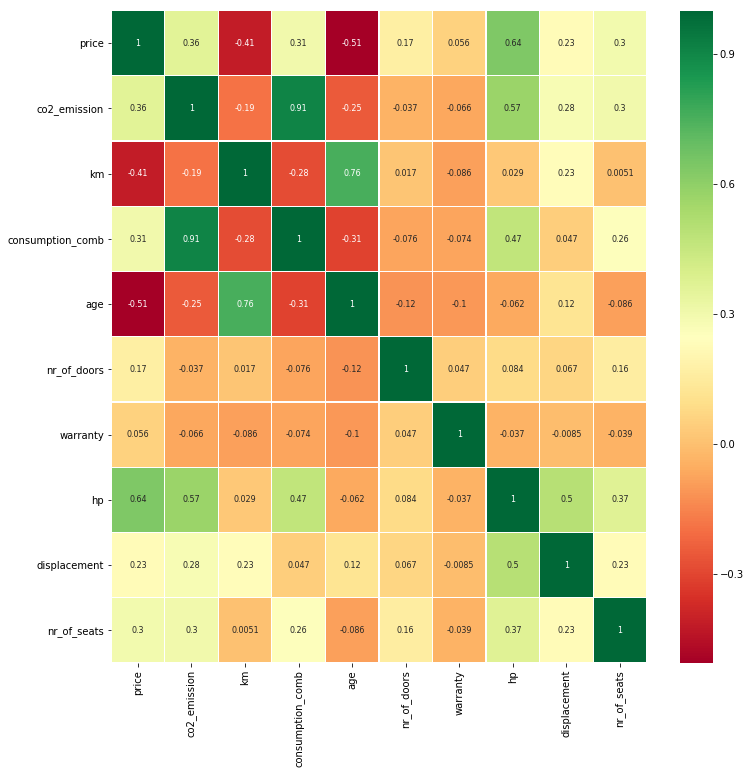

In [163]:
plt.figure(figsize=(12,12))
sns.heatmap(df_new.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})

**PAIR PLOT**

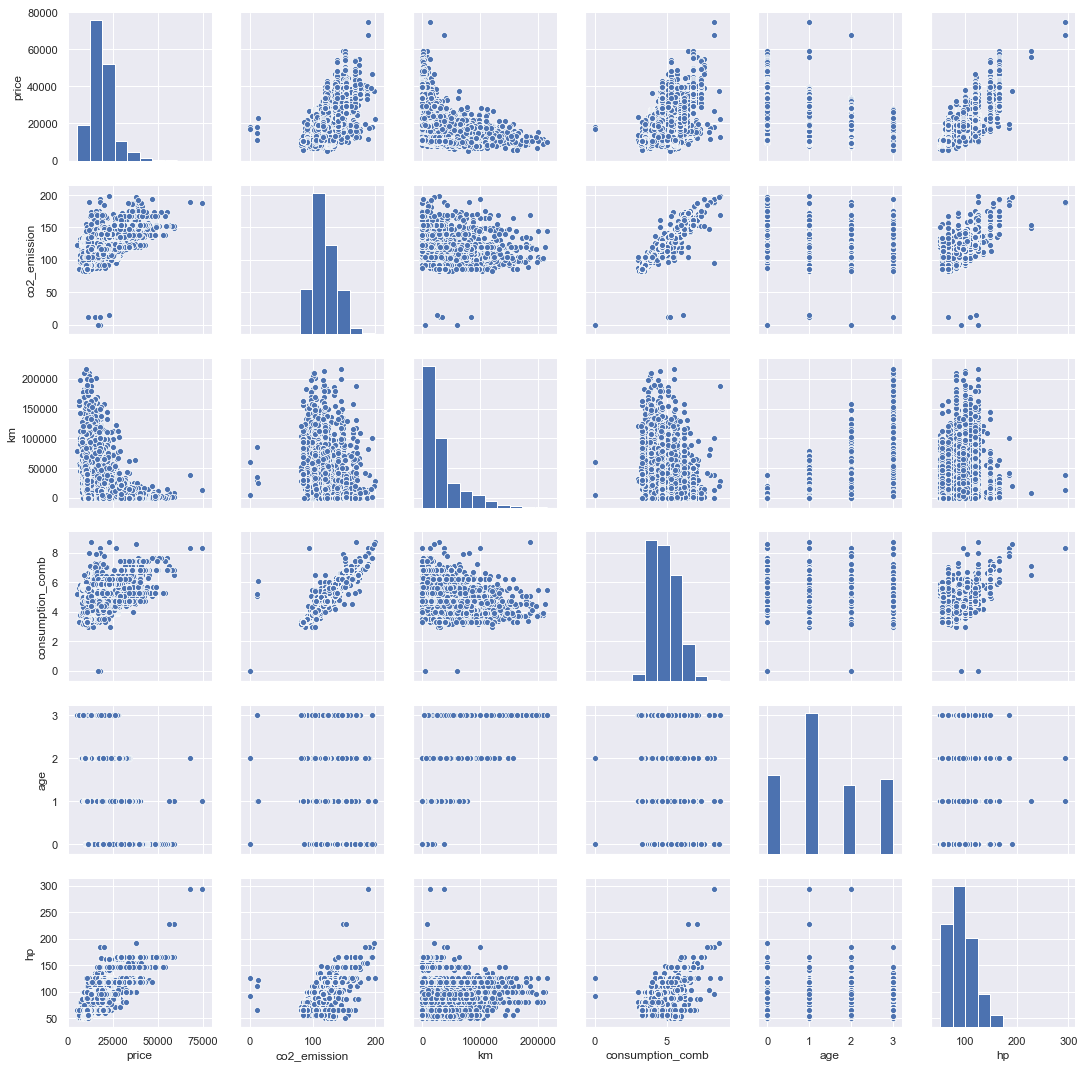

In [27]:
# aqcuire another list of columns called "cals" from important columns of columns_new. 
# And see the scatter plot of these columns.
sns.set()
cols=["price", "co2_emission", "km", "consumption_comb", "age", "hp"]
sns.pairplot(df[cols], size = 2.5)
plt.show()

**HP**

In [164]:
df.hp.describe()

count    6574.000000
mean       91.636447
std        25.591892
min        51.000000
25%        70.000000
50%        85.000000
75%       108.500000
max       294.000000
Name: hp, dtype: float64

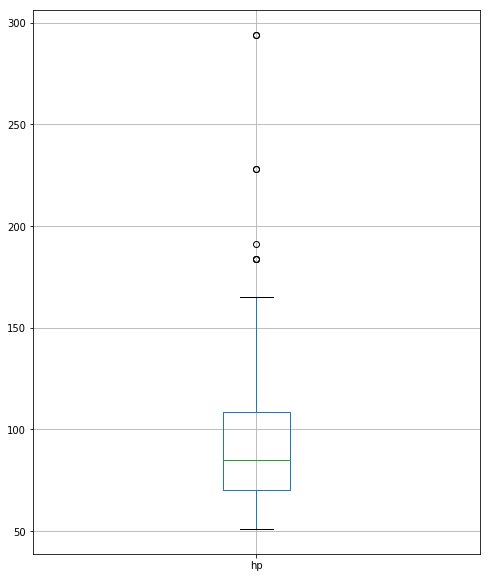

In [165]:
df.boxplot('hp')

**KM**

In [35]:
df.km.describe()

count      6567.000000
mean      30571.438252
std       33637.522141
min           1.000000
25%        5990.000000
50%       21200.000000
75%       40588.000000
max      216560.000000
Name: km, dtype: float64

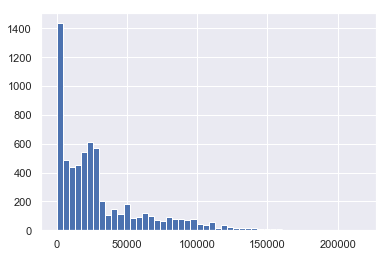

In [36]:
df['km'].hist(bins=50)

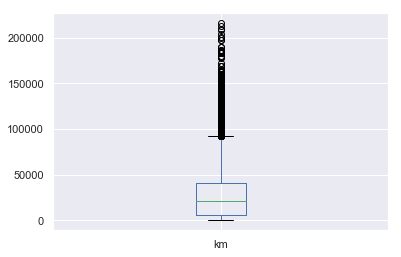

In [37]:
df.boxplot('km')

**AGE**

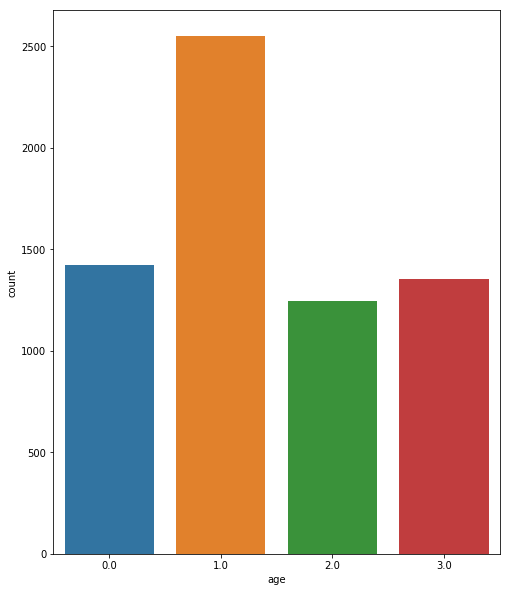

In [166]:
sns.countplot(df.age)

**CONSUMPTION_COMB**

In [39]:
df.consumption_comb.describe()

count    6567.000000
mean        4.846383
std         0.904824
min         3.000000
25%         4.100000
50%         4.700000
75%         5.500000
max         8.700000
Name: consumption_comb, dtype: float64

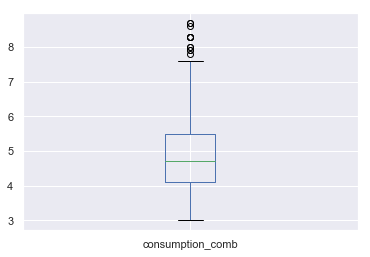

In [40]:
df.boxplot('consumption_comb')

**GEARING TYPE**

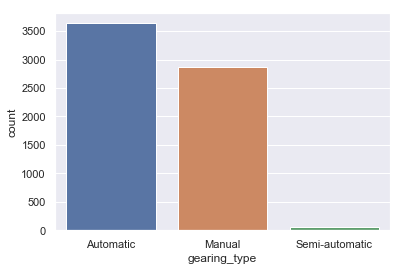

In [41]:
sns.countplot(df.gearing_type)

**MAKE**

In [42]:
df.make.value_counts(dropna=False)

Opel       2875
Audi       2756
Renault     936
Name: make, dtype: int64

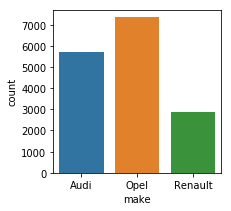

In [237]:
plt.figure(figsize=(3,3))
sns.countplot(df.make)

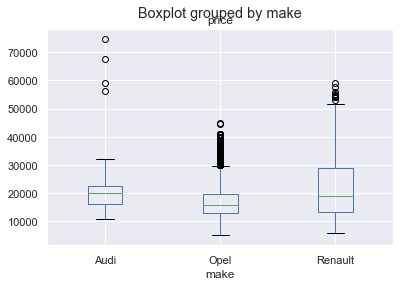

In [44]:
df.boxplot(column='price', by = 'make')

**MODEL**

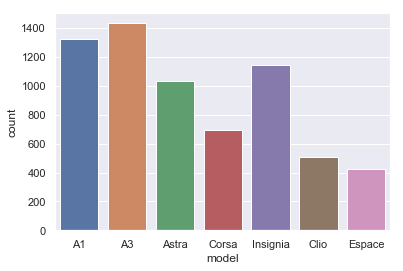

In [45]:
sns.countplot(df.model)

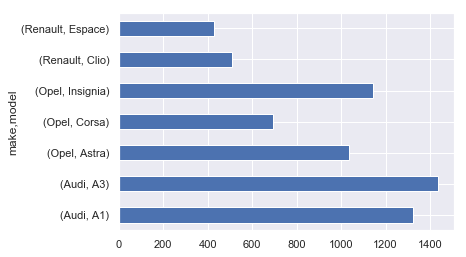

In [46]:
df.groupby(['make', 'model']).size().plot.barh()

**BODY**

In [47]:
df.body.value_counts(dropna=False)

Sedans           3129
Station wagon    1652
Compact          1373
Van               338
Other              47
Transporter        19
Coupe               5
Off-Road            2
Convertible         2
Name: body, dtype: int64

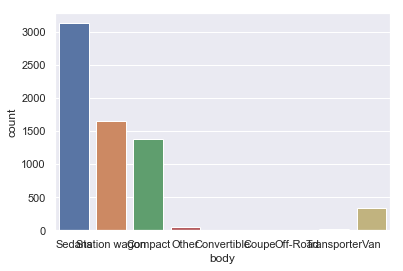

In [48]:
sns.countplot(df.body)

**BODY COLOR**

In [49]:
df.body_color.value_counts(dropna=False)

Black     1721
Grey      1527
White     1226
Silver     772
Blue       596
Red        448
Brown      131
Green       79
Beige       48
Yellow      17
Bronze       1
Violet       1
Name: body_color, dtype: int64

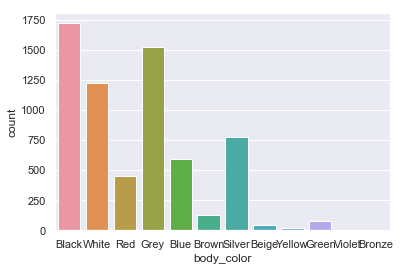

In [50]:
sns.countplot(df.body_color)

**NR_OF_DOORS**

In [167]:
df.nr_of_doors.unique(),

(array([5., 4., 3., 2.]),)

In [168]:
df.nr_of_doors.value_counts(dropna=False)

5.0    4511
4.0    1691
3.0     280
2.0      92
Name: nr_of_doors, dtype: int64

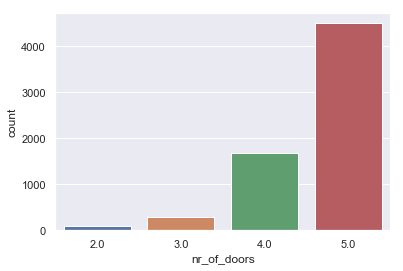

In [53]:
sns.countplot(df.nr_of_doors)

**NR_OF_SEATS**

In [169]:
df.nr_of_seats.unique()

array([5., 4., 3., 2., 7.])

In [170]:
df.nr_of_seats.value_counts(dropna=False)

5.0    5804
4.0     579
7.0     184
2.0       6
3.0       1
Name: nr_of_seats, dtype: int64

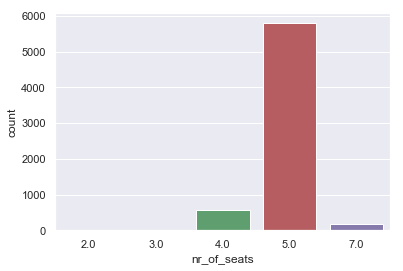

In [56]:
sns.countplot(df.nr_of_seats)

**TYPE**

In [57]:
df.type.unique()

array(['Used', "Employee's car", 'Demonstration', 'Pre-registered', 'New'],
      dtype=object)

In [171]:
df.type.value_counts(dropna=False)

Used              4613
Employee's car     757
Pre-registered     740
Demonstration      448
New                 16
Name: type, dtype: int64

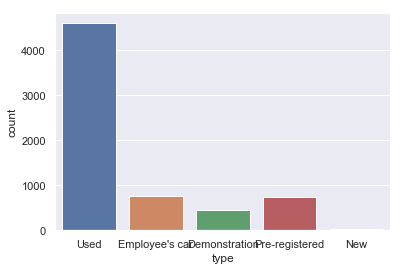

In [59]:
sns.countplot(df.type)

**DISPLACEMENT**

In [60]:
df.displacement.head()

0    1422.0
2    1598.0
4    1422.0
5    1598.0
6    1598.0
Name: displacement, dtype: float64

In [61]:
df.displacement.describe()

count     6567.000000
mean      1456.073550
std        328.567204
min        122.000000
25%       1364.000000
50%       1490.000000
75%       1598.000000
max      15898.000000
Name: displacement, dtype: float64

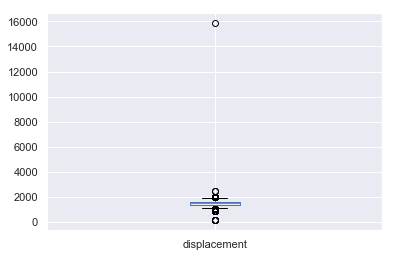

In [62]:
df.boxplot('displacement')

In [172]:
df.displacement[df.displacement>4000]

7169    15898.0
Name: displacement, dtype: float64

In [173]:
df = df.drop([7169])

In [174]:
df.displacement[df.displacement<800]

7809     139.0
7810     139.0
7811     139.0
7812     139.0
10194    122.0
Name: displacement, dtype: float64

In [175]:
df = df.drop([7809, 7810, 7811, 7812, 10194])

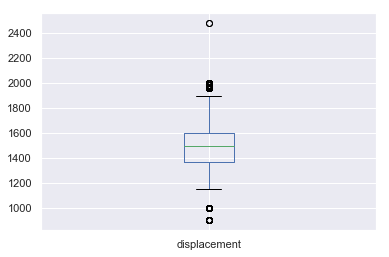

In [67]:
df.boxplot('displacement')

**NEXT_INSPECTION AND INSPECTION_NEW COLUMNS**

In [189]:
df.inspection_new.head()

0    1
2    0
4    1
5    0
6    1
Name: inspection_new, dtype: int64

**PROFILING**

In [71]:
import pandas_profiling

In [95]:
profile = pandas_profiling.ProfileReport(df)

In [96]:
profile.to_file(outputfile="outputfile.html")

In [154]:
#display(profile)

In [176]:
print(df['consumption_comb'].corr(df['co2_emission']))

0.9091843885265388


In [177]:
df.drop(['co2_emission'], axis=1, inplace=True)

In [74]:
df.dtypes[df.dtypes == 'object']

make                 object
model                object
description          object
body                 object
body_color           object
gearing_type         object
short_description    object
fuel                 object
type                 object
url                  object
dtype: object

In [178]:
df.drop(['description', 'short_description', 'url'], axis=1, inplace=True)

In [179]:
df= pd.get_dummies(df)

In [195]:
df.dtypes[df.dtypes == 'object']

Series([], dtype: object)

In [78]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,next_inspection_bool,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,True,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,False,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,

In [180]:
df.drop(['next_inspection_bool'], axis=1, inplace=True)

In [80]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_seats,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_right_hand_drive,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,

In [108]:
profile = pandas_profiling.ProfileReport(df)

In [109]:
profile.to_file(outputfile="outputfile.html")

In [ ]:
# According to profiling we drop cc_leather_seats', 'ext_right_hand_drive columns.

In [181]:
df.drop(['cc_leather_seats', 'ext_right_hand_drive'], axis=1, inplace=True)

In [198]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.

In [182]:
df.shape

(6568, 144)

In [183]:
# Create a new column with sum of dummy values (total number of car attributes)
df['ss_sum'] = df.filter(like="ss_").sum(axis=1)
df['cc_sum'] = df.filter(like="cc_").sum(axis=1)
df['ext_sum'] = df.filter(like="ext_").sum(axis=1)
df['ent_sum'] = df.filter(like="ent_").sum(axis=1)

In [29]:
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,ss_daytime_running_lights,ss_driver_drowsiness_detection,ss_driver_side_airbag,ss_electronic_stability_control,ss_emergency_brake_assistant,ss_emergency_system,ss_fog_lights,ss_head_airbag,ss_immobilizer,ss_isofix,ss_led_daytime_running_lights,ss_led_headlights,ss_lane_departure_warning_system,ss_night_view_assist,ss_passenger_side_airbag,ss_power_steering,ss_rear_airbag,ss_side_airbag,ss_tire_pressure_monitoring_system,ss_traction_control,ss_traffic_sign_recognition,ss_xenon_headlights,consumption_comb,inspection_new,price,age,ent_media_bluetooth,ent_media_cd_player,ent_media_digital_radio,ent_media_hands_free_equipment,ent_media_mp3,ent_media_on_board_computer,ent_media_radio,ent_media_sound_system,ent_media_television,ent_media_usb,nr_of_doors,nr_of_seats,warranty,cc_air_conditioning,cc_air_suspension,cc_armrest,cc_automatic_climate_control,cc_auxiliary_heating,cc_cruise_control,cc_electric_starter,cc_electric_tailgate,cc_electrical_side_mirrors,cc_electrically_adjustable_seats,cc_electrically_heated_windshield,cc_heads_up_display,cc_heated_steering_wheel,cc_hill_holder,cc_keyless_central_door_lock,cc_leather_steering_wheel,cc_light_sensor,cc_lumbar_support,cc_massage_seats,cc_multi_function_steering_wheel,cc_navigation_system,cc_panorama_roof,cc_park_distance_control,cc_parking_assist_system_camera,cc_parking_assist_system_self_steering,cc_parking_assist_system_sensors_front,cc_parking_assist_system_sensors_rear,cc_power_windows,cc_rain_sensor,cc_seat_heating,cc_seat_ventilation,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_cab_or_rented_car,ext_catalytic_converter,ext_handicapped_enabled,ext_roof_rack,ext_shift_paddles,ext_ski_bag,ext_sliding_door,ext_sport_package,ext_sport_seats,ext_sport_suspension,ext_touch_screen,ext_trailer_hitch,ext_tuned_car,ext_voice_control,ext_winter_tyres,make_Audi,make_Opel,make_Renault,model_A1,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia,body_Compact,body_Convertible,body_Coupe,body_Off-Road,body_Other,body_Sedans,body_Station wagon,body_Transporter,body_Van,body_color_Beige,body_color_Black,body_color_Blue,body_color_Bronze,body_color_Brown,body_color_Green,body_color_Grey,body_color_Red,body_color_Silver,body_color_Violet,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Manual,gearing_type_Semi-automatic,fuel_Biogas/LPG,fuel_Diesel,fuel_Gasoline,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,3.8,1,15770,3.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,3.8,0,14640,3.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,4.0,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
4,1422.0,66.0,16200.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,4.1,1,16790,3.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,5.0,5.0,1,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.

In [184]:
df.ss_sum.head()

0    14.0
2    12.0
4    13.0
5    15.0
6    13.0
Name: ss_sum, dtype: float64

In [272]:
import statsmodels.formula.api as sm 

In [ ]:
#let's make price column the last column.

In [185]:
df.shape

(6568, 148)

**MODEL**

In [186]:
X=df.drop(['price'], axis=1).values

In [187]:
X.shape

(6568, 147)

In [188]:
y=df['price'].values

In [189]:
y.shape

(6568,)

In [190]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [191]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [192]:
print(reg.score(X_test,y_test))

0.9071381442881664


In [193]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=reg, X=X_train, y=y_train, cv=10)
accuraries

array([0.89779378, 0.90103604, 0.8936303 , 0.87714356, 0.9060078 ,
       0.89226164, 0.88432463, 0.88261258, 0.92307124, 0.89562229])

In [194]:
accuraries.mean()

0.8953503861997701

**OLS**

In [195]:
X=np.append(arr=np.ones((6568, 1)).astype(int), values=X, axis=1)

In [196]:
reg_OLS=sm.OLS(y, X).fit()

In [197]:
reg_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     460.5
Date:                Sat, 13 Jul 2019   Prob (F-statistic):               0.00
Time:                        17:34:52   Log-Likelihood:                -59426.
No. Observations:                6568   AIC:                         1.191e+05
Df Residuals:                    6433   BIC:                         1.200e+05
Df Model:                         134                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6611.7120    351.153     18.829      0.000    5923.336    7300.088
x1            -0.8684      0.299     -2.905      0.004      -1.454      -0.282
x2            83.9939      3.204     26.215      0.000      77.713      90.275
x3            -0.0349      0.001    -26.024      0.000      -0.037      -0.032
x4           645.6222    177.310      3.641      0.000     298.036     993.208
x5          -122.2542    124.207     -0.984      0.325    -365.742     121.233
x6           240.5859     98.724      2.437      0.015      47.054     434.118
x7           781.7778    121.253      6.447      0.000     544.081    1019.474
x8          -780.9175    135.729     -5.754      0.000   -1046.991    -514.844
x9          -233.2101    119.063     -1.959      0.050    -466.613       0.193
x10          428.6606    154.107      2.782      0.005     126.559     730.762
x11         -383.8994     88.563     -4.335      0.000    -557.512    -210.286
x12         -288.5402    170.453     -1.693      0.091    -622.685      45.604
x13           87.6696    214.129      0.409      0.682    -332.094     507.434
x14         -399.4829    139.865     -2.856      0.004    -673.664    -125.301
x15          291.0911     98.102      2.967      0.003      98.778     483.404
x16         -605.4087    101.332     -5.975      0.000    -804.053    -406.764
x17         -135.7800     69.881     -1.943      0.052    -272.770       1.210
x18          -87.9260    164.421     -0.535      0.593    -410.245     234.393
x19         -365.3061     83.849     -4.357      0.000    -529.679    -200.933
x20         -291.5229     96.887     -3.009      0.003    -481.454    -101.592
x21          -54.7346     76.490     -0.716      0.474    -204.681      95.212
x22          427.2415     88.990      4.801      0.000     252.792     601.691
x23          419.8204    107.961      3.889      0.000     208.182     631.459
x24         1614.2811    549.066      2.940      0.003     537.930    2690.632
x25         -144.0651    191.750     -0.751      0.452    -519.959     231.829
x26         -822.3267    141.220     -5.823      0.000   -1099.166    -545.488
x27          -88.5714    195.209     -0.454      0.650    -471.246     294.103
x28         -135.3280    142.338     -0.951      0.342    -414.357     143.702
x29          196.0889     87.861      2.232      0.026      23.851     368.326
x30          322.6959     86.370      3.736      0.000     153.381     492.011
x31         -102.1848    115.902     -0.882      0.378    -329.392     125.023
x32         -303.2838     83.801     -3.619      0.000    -467.562    -139.006
x33          182.4266     74.020      2.465      0.014      37.323     327.531
x34          -64.2164     66.292     -0.969      0.333    -194.170      65.737
x35        -1777.3134     48.676    -36.513      0.000   -1872.734   -1681.893
x3

In [198]:
list=[]
for i in reg_OLS.pvalues:
    if i <0.05:
      list.append(i)

In [199]:
len(list)

78

In [200]:
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x

In [201]:
X_opt=backwardElimination(X, 0.05)

In [202]:
X_opt.shape

(6568, 87)

**X_opt MODEL**

In [203]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_opt, y, test_size=0.2, random_state=0)

In [204]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [205]:
print(reg.score(X_test2,y_test2))

0.9075735537651436


In [206]:
from sklearn.model_selection import cross_val_score
accuraries2 = cross_val_score(estimator=reg, X=X_train2, y=y_train2, cv=10)
accuraries2

array([0.89756334, 0.90203074, 0.89643047, 0.87749952, 0.90834963,
       0.89390252, 0.88487911, 0.88449596, 0.92438502, 0.89852546])

In [207]:
print(accuraries2.mean())

0.8968061777520685


**Backward Elimination**

In [208]:
import statsmodels.api as sm
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [209]:
X.shape

(6568, 148)

In [210]:
# There are 87 columns in optimum dataframe. One of them is constant value. So we will define 86 columns.

In [211]:
X=df.drop(['price'], axis=1)

In [212]:
y=df['price']

In [213]:
del list

In [214]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['displacement', 'hp', 'km', 'ss_abs', 'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock', 'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights', 'ss_electronic_stability_control', 'ss_emergency_brake_assistant', 'ss_emergency_system', 'ss_fog_lights', 'ss_immobilizer', 'ss_isofix', 'ss_led_headlights', 'ss_lane_departure_warning_system', 'ss_night_view_assist', 'ss_power_steering', 'ss_traction_control', 'ss_xenon_headlights', 'consumption_comb', 'age', 'ent_media_cd_player', 'ent_media_digital_radio', 'ent_media_mp3', 'ent_media_radio', 'nr_of_doors', 'cc_armrest', 'cc_auxiliary_heating', 'cc_cruise_control', 'cc_heads_up_display', 'cc_keyless_central_door_lock', 'cc_lumbar_support', 'cc_massage_seats', 'cc_multi_function_steering_wheel', 'cc_panorama_roof', 'cc_park_distance_control', 'cc_parking_assist_system_camera', 'cc_parking_assist_system_self_steering', 'cc_parking_assist_system_sensors_rear', 'cc_power_windows', 'cc_rain_sensor', 'cc_seat_ve

In [215]:
len(cols)

86

**LASSO (alpha=3)**

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=10)

In [ ]:
#when alpha is 0, Lasso regression produces the same coefficients as a linear regression.
#When alpha is very very large, all coefficients are zero.

In [118]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 3, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.878


In [119]:
# Perform 5-fold cross-validation
cv_scores = cross_val_score(lasso, X_train, y_train, cv=5)

print("Average 5-Fold CV Score: {0:.3f}".format(np.mean(cv_scores)))

Average 5-Fold CV Score: 0.880


In [120]:
df_features = df.drop('price', axis = 1)

In [121]:
feature_coef = pd.DataFrame({'features' : df_features.columns, 'coef' : lasso.coef_})

In [122]:
significants = feature_coef.loc[feature_coef.coef != 0, :]
significants.shape
len(significants)

32

In [123]:
significants

,features,coef
1,hp,94.624198
2,km,-0.026442
6,ss_alarm_system,544.065110
10,ss_daytime_running_lights,-171.268025
15,ss_emergency_system,-92.973683
16,ss_fog_lights,-91.022074
19,ss_isofix,-43.802822
21,ss_led_headlights,297.969457
25,ss_power_steering,-289.848715
34,age,-1912.941511


**LASSO (alpha=1)**

In [126]:
# Instantiate Lasso regressor
lasso = Lasso(alpha = 1, normalize = True)

# Fit the regressor
lasso.fit(X_train, y_train)

# Print the R-squared
print("R^2: {0:.3f}".format(lasso.score(X_test, y_test)))

R^2: 0.894


In [127]:
feature_coef = pd.DataFrame({'features' : df_features.columns, 'coef' : lasso.coef_})

In [128]:
significants = feature_coef.loc[feature_coef.coef != 0, :]
significants.shape
len(significants)

58

In [129]:
significants

,features,coef
1,hp,88.315363
2,km,-0.031440
6,ss_alarm_system,678.710596
10,ss_daytime_running_lights,-342.727369
13,ss_electronic_stability_control,-55.076782
14,ss_emergency_brake_assistant,126.403113
15,ss_emergency_system,-491.166968
16,ss_fog_lights,-267.599695
18,ss_immobilizer,-89.861803
19,ss_isofix,-198.008047


**HANDLING MISSING VALUES and OUTLIERS**

In [102]:
import pandas as pd
import json       
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import pandas_profiling
import warnings
warnings.filterwarnings('ignore')

In [103]:
df=pd.read_pickle("autos_20190708.pkl")

In [104]:
df.shape

(15919, 136)

In [105]:
drop_list=df.columns[df.isnull().mean() > 0.20]
df.drop(drop_list, axis=1, inplace=True)

In [106]:
#drop double columns:
df.drop(['body_type', 'first_registration'], axis=1, inplace=True)

In [107]:
# offer_number has many unique values.(5956). Let's drop it.
df.drop('offer_number', axis=1, inplace=True)

In [5]:
df.isnull().mean()[df.isnull().mean() > 0].sort_values(ascending=True)

type                                 0.000126
short_description                    0.002890
body_type                            0.003769
body                                 0.003769
hp                                   0.005528
nr_of_doors                          0.013317
displacement                         0.031158
body_color                           0.037502
cc_air_conditioning                  0.057793
cc_heated_steering_wheel             0.057793
cc_heads_up_display                  0.057793
cc_electrically_heated_windshield    0.057793
cc_electrically_adjustable_seats     0.057793
cc_electrical_side_mirrors           0.057793
cc_electric_tailgate                 0.057793
cc_automatic_climate_control         0.057793
cc_cruise_control                    0.057793
cc_auxiliary_heating                 0.057793
cc_armrest                           0.057793
cc_air_suspension                    0.057793
cc_wind_deflector                    0.057793
cc_electric_starter               

**type**

In [108]:
df["type"].fillna("Used", inplace = True) 

**body**

In [109]:
df["body"].fillna("Sedans", inplace = True) 

**hp**

<Figure size 144x144 with 0 Axes>

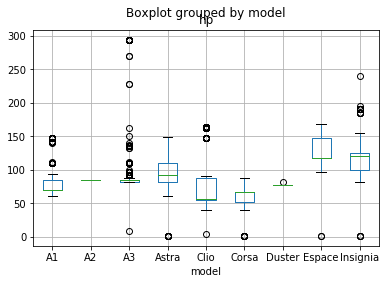

In [110]:
plt.figure(figsize=(2,2))
df.boxplot(column='hp', by = 'model')

In [111]:
df['hp'].fillna(df.groupby('model')['hp'].transform("mean"), inplace=True)

**nr_of_doors**

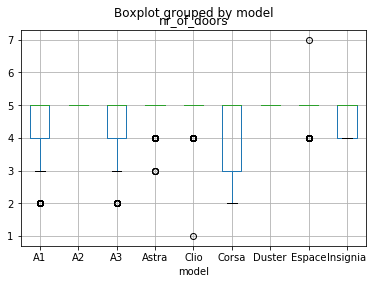

In [112]:
df.boxplot(column='nr_of_doors', by = 'model')

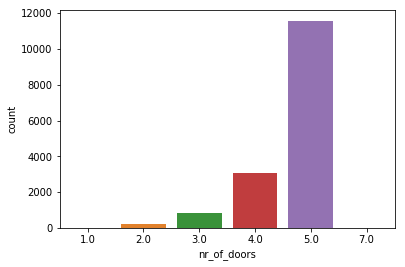

In [113]:
sns.countplot(df.nr_of_doors)

In [114]:
df["nr_of_doors"]=df["nr_of_doors"].fillna(5) 

**displacement**

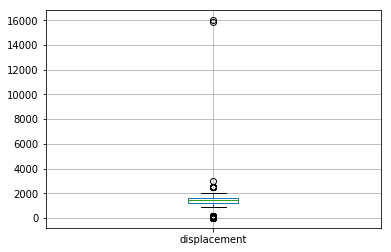

In [115]:
df.boxplot('displacement')

In [116]:
df.displacement[df.displacement>4000]

7169     15898.0
10932    16000.0
Name: displacement, dtype: float64

In [117]:
df = df.drop([7169, 10932])

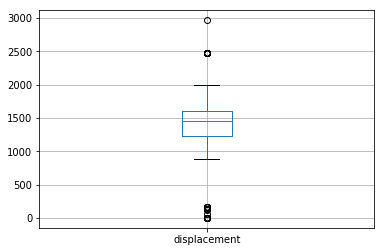

In [118]:
df.boxplot('displacement')

In [119]:
df.displacement[df.displacement<500].value_counts()

1.0      36
160.0     6
139.0     4
2.0       2
54.0      1
122.0     1
140.0     1
Name: displacement, dtype: int64

In [120]:
drop_list_disp=df.displacement[df.displacement<500].index

In [121]:
df = df.drop(drop_list_disp)

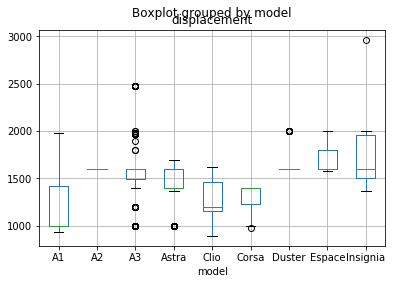

In [377]:
df.boxplot(column='displacement', by = 'model')

In [122]:
df['displacement'].fillna(df.groupby('model')['displacement'].transform("mean"), inplace=True)

**body_color**

In [123]:
df["body_color"].fillna("Black", inplace = True) 

**age**

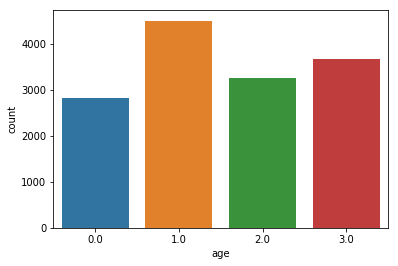

In [380]:
sns.countplot(df.age)

In [381]:
# In heat meap age has huge corr with km, price and cons_comb.
#no missing value in price column, but km and cons_comb have.
# firstly fill these columns then make a classification.

In [382]:
df.km.isnull().sum()

1017

In [383]:
df.consumption_comb.isnull().sum()

2836

**km**

In [124]:
df['km'].fillna(df.groupby('price')['km'].transform("mean"), inplace=True)

In [23]:
df.km.isnull().sum()

435

In [125]:
df=df.dropna(subset=['km'])

In [126]:
df.km = df.km.astype('int64')

**consumption_comb (linear reg)**

In [388]:
df.consumption_comb.describe()

count    12638.000000
mean         4.772282
std          0.918374
min          0.000000
25%          4.000000
50%          4.700000
75%          5.400000
max          9.100000
Name: consumption_comb, dtype: float64

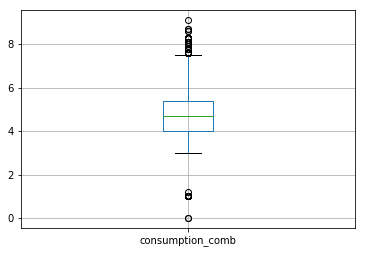

In [389]:
df.boxplot(column='consumption_comb')

In [390]:
# has corr with co2_emission (0.91)

In [391]:
df.co2_emission.isnull().sum()

2242

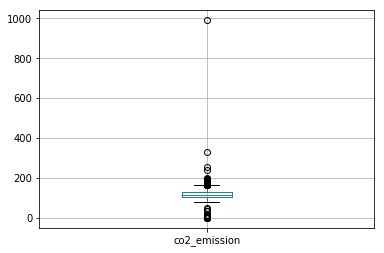

In [392]:
df.boxplot(column='co2_emission')

In [393]:
#after we handle missing values of consumption_comb we will drop co2_emission. 
# so no need to handle outliers. just use median instead of mean fo fullfill the column. 

In [127]:
df["co2_emission"] = df["co2_emission"].fillna(value=df["co2_emission"].median())

In [394]:
#let's make a regression btwnn co2_emission and consumption_comb

In [128]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
data = df[['co2_emission','consumption_comb']]

In [129]:
x_train = data[data['consumption_comb'].notnull()].drop(columns='consumption_comb')
y_train = data[data['consumption_comb'].notnull()]['consumption_comb']
x_test = data[data['consumption_comb'].isnull()].drop(columns='consumption_comb')
y_test = data[data['consumption_comb'].isnull()]['consumption_comb']

In [130]:
linreg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [131]:
predicted = linreg.predict(x_test)

In [132]:
df.consumption_comb[df.consumption_comb.isnull()] = predicted

In [32]:
df.consumption_comb.describe()

count    15431.000000
mean         4.782442
std          0.848686
min          0.000000
25%          4.200000
50%          4.732395
75%          5.300000
max          9.100000
Name: consumption_comb, dtype: float64

In [132]:
#before regression mean was 4.77, after regression 4,78. it seems well.
#but there are outliers to be handled. We will look again to outliers after feature eng to fuel column.

In [133]:
df.consumption_comb.isnull().any()

False

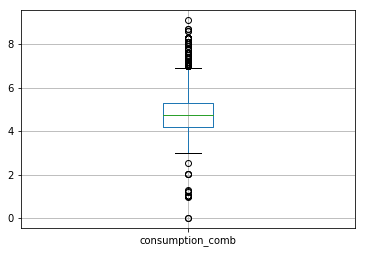

In [406]:
df.boxplot(column='consumption_comb')

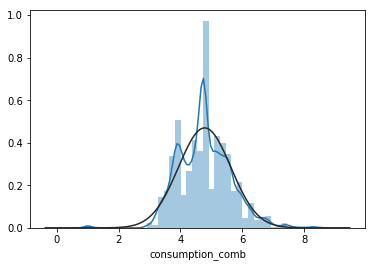

In [407]:
sns.distplot(df.consumption_comb, fit=norm)

**fuel**

In [134]:
df.fuel.isnull().sum()

0

In [135]:
fuel_dict = {r'Diesel.*': 'diesel', 
             r'(Gasoline|Super|Regular).*': 'gasoline',
             r'.*(LPG|CNG|gas).*': 'lpg', 
             r'Electric.*':'electric',
             r'Others.*': np.nan
            }
df.fuel.replace(fuel_dict, regex = True, inplace=True)

In [35]:
df.fuel.value_counts()

gasoline    8227
diesel      7130
lpg           63
electric       5
Name: fuel, dtype: int64

**outliers in consumption_comb**

In [36]:
df[df.consumption_comb<2].fuel.value_counts()

gasoline    39
diesel       4
Name: fuel, dtype: int64

In [412]:
#it is not normal to have consumbtion below 2 for a gasoline powered car.
#it seems these 43 values are outliers. 

In [136]:
drop_list_consumtion=df[df.consumption_comb<2].index

In [137]:
len(drop_list_consumtion)

43

In [138]:
df = df.drop(drop_list_consumtion)

**filling age column with classification**

In [40]:
df.age.isnull().sum()

1173

In [417]:
df.age.describe()

count    14215.000000
mean         1.550686
std          1.074318
min          0.000000
25%          1.000000
50%          1.000000
75%          3.000000
max          3.000000
Name: age, dtype: float64

In [139]:
data=df[['age', 'km', 'consumption_comb', 'price']]

In [140]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=0)

In [141]:
x_train = data[data['age'].notnull()].drop(columns='age')
y_train = data[data['age'].notnull()]['age']
x_test = data[data['age'].isnull()].drop(columns='age')
y_test = data[data['age'].isnull()]['age']

In [142]:
classifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [143]:
predicted = classifier.predict(x_test)

In [144]:
df.age[df.age.isnull()] = predicted

In [145]:
df.age = df.age.astype('int64')

In [146]:
df.age.isnull().sum()

0

In [147]:
df.age.describe()

count    15388.000000
mean         1.458409
std          1.097637
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.000000
Name: age, dtype: float64

In [427]:
#mean was 1.55 but now 1.45. anyway it's ok.

**ss_ columns**

In [148]:
df.filter(like = 'ss_', axis = 1).columns

Index(['ss_abs', 'ss_adaptive_cruise_control', 'ss_adaptive_headlights',
       'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock',
       'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights',
       'ss_driver_drowsiness_detection', 'ss_driver_side_airbag',
       'ss_electronic_stability_control', 'ss_emergency_brake_assistant',
       'ss_emergency_system', 'ss_fog_lights', 'ss_head_airbag',
       'ss_immobilizer', 'ss_isofix', 'ss_led_daytime_running_lights',
       'ss_led_headlights', 'ss_lane_departure_warning_system',
       'ss_night_view_assist', 'ss_passenger_side_airbag', 'ss_power_steering',
       'ss_rear_airbag', 'ss_side_airbag',
       'ss_tire_pressure_monitoring_system', 'ss_traction_control',
       'ss_traffic_sign_recognition', 'ss_xenon_headlights',
       'cc_keyless_central_door_lock'],
      dtype='object')

In [149]:
ss_list=['ss_abs', 'ss_adaptive_cruise_control', 'ss_adaptive_headlights',
       'ss_alarm_system', 'ss_blind_spot_monitor', 'ss_central_door_lock',
       'ss_central_door_lock_with_remote_control', 'ss_daytime_running_lights',
       'ss_driver_drowsiness_detection', 'ss_driver_side_airbag',
       'ss_electronic_stability_control', 'ss_emergency_brake_assistant',
       'ss_emergency_system', 'ss_fog_lights', 'ss_head_airbag',
       'ss_immobilizer', 'ss_isofix', 'ss_led_daytime_running_lights',
       'ss_led_headlights', 'ss_lane_departure_warning_system',
       'ss_night_view_assist', 'ss_passenger_side_airbag', 'ss_power_steering',
       'ss_rear_airbag', 'ss_side_airbag',
       'ss_tire_pressure_monitoring_system', 'ss_traction_control',
       'ss_traffic_sign_recognition', 'ss_xenon_headlights']

In [150]:
df_ss=df[ss_list]

In [151]:
df_ss.shape

(15388, 29)

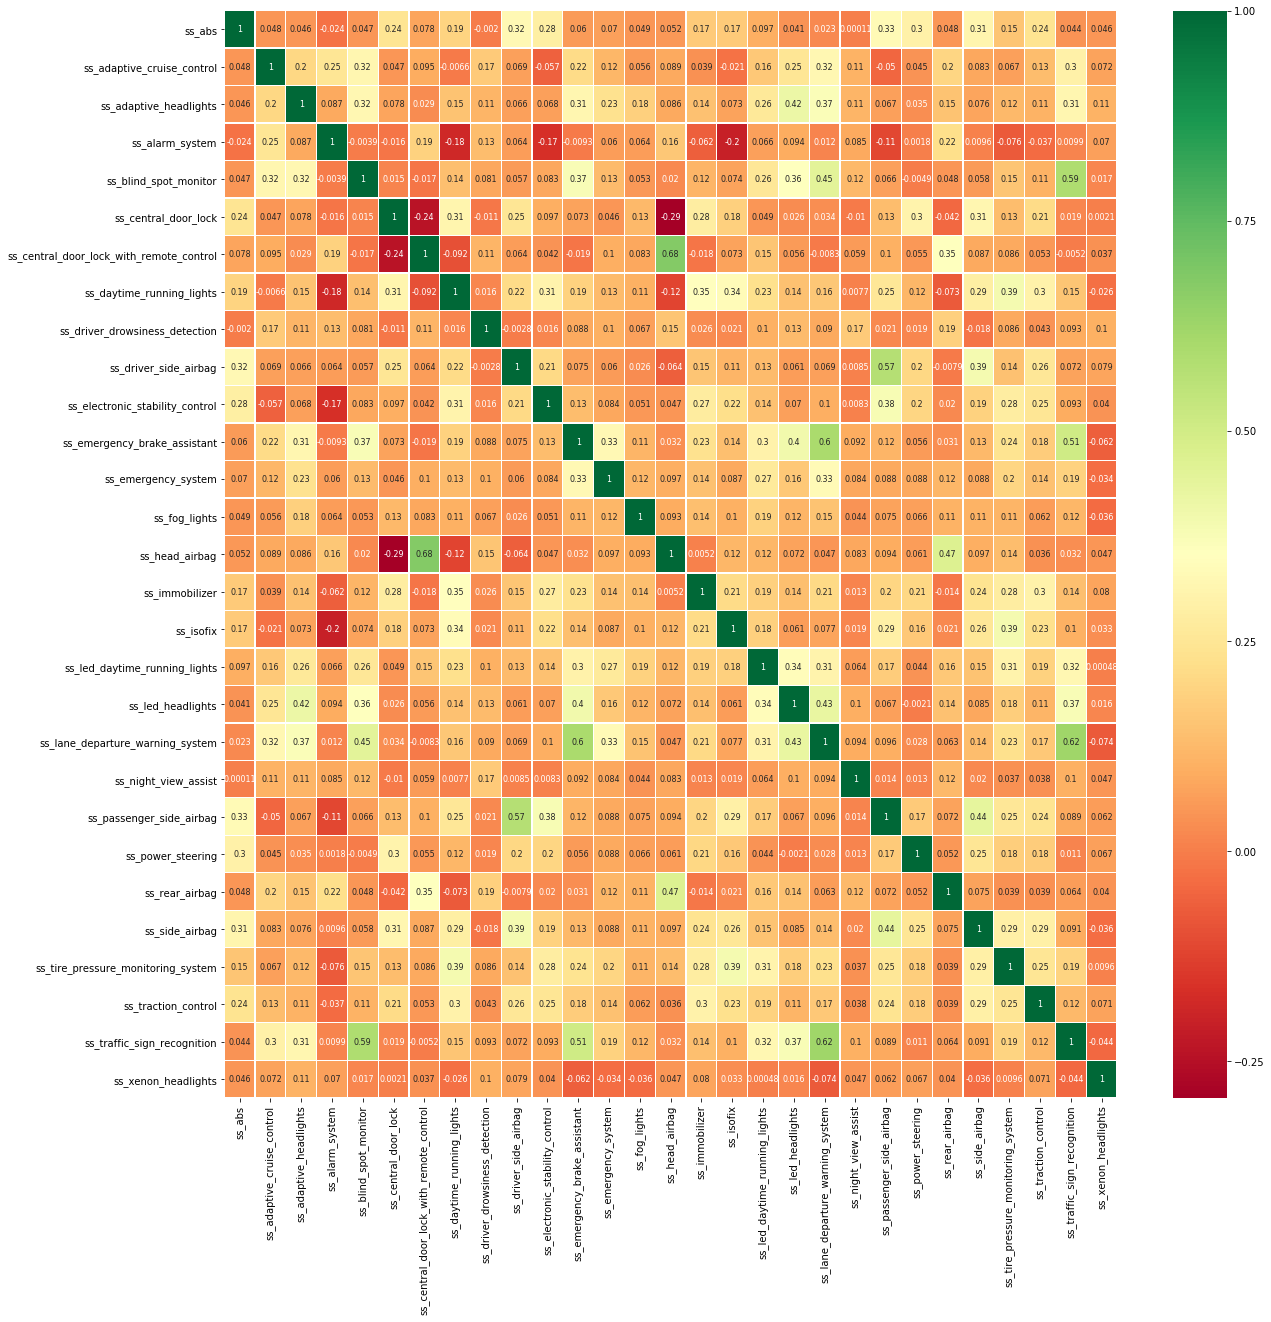

In [434]:
plt.figure(figsize=(20,20))
sns.heatmap(df_ss.corr(),annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':8})

In [435]:
df_ss.isnull().sum()

ss_abs                                      858
ss_adaptive_cruise_control                  858
ss_adaptive_headlights                      858
ss_alarm_system                             858
ss_blind_spot_monitor                       858
ss_central_door_lock                        858
ss_central_door_lock_with_remote_control    858
ss_daytime_running_lights                   858
ss_driver_drowsiness_detection              858
ss_driver_side_airbag                       858
ss_electronic_stability_control             858
ss_emergency_brake_assistant                858
ss_emergency_system                         858
ss_fog_lights                               858
ss_head_airbag                              858
ss_immobilizer                              858
ss_isofix                                   858
ss_led_daytime_running_lights               858
ss_led_headlights                           858
ss_lane_departure_warning_system            858
ss_night_view_assist                    

In [436]:
# let' try to fill ss_abs with make, model and age columns.

In [152]:
data1=df[['age', 'make', 'model']]
data1=pd.get_dummies(data1)
data2=df[['ss_abs']]
data=data1.join(data2)

In [153]:
data.columns

Index(['age', 'make_Audi', 'make_Opel', 'make_Renault', 'model_A1', 'model_A2',
       'model_A3', 'model_Astra', 'model_Clio', 'model_Corsa', 'model_Duster',
       'model_Espace', 'model_Insignia', 'ss_abs'],
      dtype='object')

In [154]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)

In [155]:
x_train = data[data['ss_abs'].notnull()].drop(columns='ss_abs')
y_train = data[data['ss_abs'].notnull()]['ss_abs']
x_test = data[data['ss_abs'].isnull()].drop(columns='ss_abs')
y_test = data[data['ss_abs'].isnull()]['ss_abs']
y_train=y_train.astype('int64')

In [156]:
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [157]:
predicted = classifier.predict(x_test)

In [158]:
data.ss_abs.mean()

0.9463179628355127

In [159]:
data.ss_abs[data.ss_abs.isnull()] = predicted

In [160]:
data.ss_abs.isnull().sum()

0

In [161]:
# ok. it's full. let's compare the means before and after.

In [162]:
data.ss_abs.mean()

0.9493111515466597

In [448]:
# now let's make for loop to fill all columns in ss_

In [163]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
data1=df[['age', 'make', 'model']]
data1=pd.get_dummies(data1)

for i in df_ss.columns:
    data2=df[[i]]
    data=data1.join(data2)
    x_train = data[data[i].notnull()].drop(columns=i)
    y_train = data[data[i].notnull()][i]
    x_test = data[data[i].isnull()].drop(columns=i)
    y_test = data[data[i].isnull()][i]
    y_train=y_train.astype('int64')
    classifier.fit(x_train, y_train)
    predicted = classifier.predict(x_test)
    df[i][df[i].isnull()] = predicted

In [49]:
df.filter(like = 'ss_', axis = 1).isnull().sum()

ss_abs                                        0
ss_adaptive_cruise_control                    0
ss_adaptive_headlights                        0
ss_alarm_system                               0
ss_blind_spot_monitor                         0
ss_central_door_lock                          0
ss_central_door_lock_with_remote_control      0
ss_daytime_running_lights                     0
ss_driver_drowsiness_detection                0
ss_driver_side_airbag                         0
ss_electronic_stability_control               0
ss_emergency_brake_assistant                  0
ss_emergency_system                           0
ss_fog_lights                                 0
ss_head_airbag                                0
ss_immobilizer                                0
ss_isofix                                     0
ss_led_daytime_running_lights                 0
ss_led_headlights                             0
ss_lane_departure_warning_system              0
ss_night_view_assist                    

**ent_columns**

In [50]:
df.filter(like = 'ent_', axis = 1).columns

Index(['ent_media_bluetooth', 'ent_media_cd_player', 'ent_media_digital_radio',
       'ent_media_hands_free_equipment', 'ent_media_mp3',
       'ent_media_on_board_computer', 'ent_media_radio',
       'ent_media_sound_system', 'ent_media_television', 'ent_media_usb'],
      dtype='object')

In [164]:
ent_list=['ent_media_bluetooth', 'ent_media_cd_player', 'ent_media_digital_radio',
       'ent_media_hands_free_equipment', 'ent_media_mp3',
       'ent_media_on_board_computer', 'ent_media_radio',
       'ent_media_sound_system', 'ent_media_television', 'ent_media_usb']

In [165]:
df_ent=df[ent_list]

In [166]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
data1=df[['age', 'make', 'model']]
data1=pd.get_dummies(data1)

for i in df_ent.columns:
    data2=df[[i]]
    data=data1.join(data2)
    x_train = data[data[i].notnull()].drop(columns=i)
    y_train = data[data[i].notnull()][i]
    x_test = data[data[i].isnull()].drop(columns=i)
    y_test = data[data[i].isnull()][i]
    y_train=y_train.astype('int64')
    classifier.fit(x_train, y_train)
    predicted = classifier.predict(x_test)
    df[i][df[i].isnull()] = predicted

In [54]:
df.filter(like = 'ent_', axis = 1).isnull().sum()

ent_media_bluetooth               0
ent_media_cd_player               0
ent_media_digital_radio           0
ent_media_hands_free_equipment    0
ent_media_mp3                     0
ent_media_on_board_computer       0
ent_media_radio                   0
ent_media_sound_system            0
ent_media_television              0
ent_media_usb                     0
dtype: int64

**cc_columns**

In [55]:
df.filter(like = 'cc_', axis = 1).columns

Index(['cc_air_conditioning', 'cc_air_suspension', 'cc_armrest',
       'cc_automatic_climate_control', 'cc_auxiliary_heating',
       'cc_cruise_control', 'cc_electric_starter', 'cc_electric_tailgate',
       'cc_electrical_side_mirrors', 'cc_electrically_adjustable_seats',
       'cc_electrically_heated_windshield', 'cc_heads_up_display',
       'cc_heated_steering_wheel', 'cc_hill_holder',
       'cc_keyless_central_door_lock', 'cc_leather_seats',
       'cc_leather_steering_wheel', 'cc_light_sensor', 'cc_lumbar_support',
       'cc_massage_seats', 'cc_multi_function_steering_wheel',
       'cc_navigation_system', 'cc_panorama_roof', 'cc_park_distance_control',
       'cc_parking_assist_system_camera',
       'cc_parking_assist_system_self_steering',
       'cc_parking_assist_system_sensors_front',
       'cc_parking_assist_system_sensors_rear', 'cc_power_windows',
       'cc_rain_sensor', 'cc_seat_heating', 'cc_seat_ventilation',
       'cc_split_rear_seats', 'cc_start_stop_system'

In [167]:
cc_list=['cc_air_conditioning', 'cc_air_suspension', 'cc_armrest',
       'cc_automatic_climate_control', 'cc_auxiliary_heating',
       'cc_cruise_control', 'cc_electric_starter', 'cc_electric_tailgate',
       'cc_electrical_side_mirrors', 'cc_electrically_adjustable_seats',
       'cc_electrically_heated_windshield', 'cc_heads_up_display',
       'cc_heated_steering_wheel', 'cc_hill_holder',
       'cc_keyless_central_door_lock', 'cc_leather_seats',
       'cc_leather_steering_wheel', 'cc_light_sensor', 'cc_lumbar_support',
       'cc_massage_seats', 'cc_multi_function_steering_wheel',
       'cc_navigation_system', 'cc_panorama_roof', 'cc_park_distance_control',
       'cc_parking_assist_system_camera',
       'cc_parking_assist_system_self_steering',
       'cc_parking_assist_system_sensors_front',
       'cc_parking_assist_system_sensors_rear', 'cc_power_windows',
       'cc_rain_sensor', 'cc_seat_heating', 'cc_seat_ventilation',
       'cc_split_rear_seats', 'cc_start_stop_system', 'cc_sunroof',
       'cc_tinted_windows', 'cc_wind_deflector', 'cc_windshield']

In [168]:
df_cc=df[cc_list]

In [169]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
data1=df[['age', 'make', 'model']]
data1=pd.get_dummies(data1)

for i in df_cc.columns:
    data2=df[[i]]
    data=data1.join(data2)
    x_train = data[data[i].notnull()].drop(columns=i)
    y_train = data[data[i].notnull()][i]
    x_test = data[data[i].isnull()].drop(columns=i)
    y_test = data[data[i].isnull()][i]
    y_train=y_train.astype('int64')
    classifier.fit(x_train, y_train)
    predicted = classifier.predict(x_test)
    df[i][df[i].isnull()] = predicted

In [59]:
df.filter(like = 'cc_', axis = 1).isnull().sum()

cc_air_conditioning                       0
cc_air_suspension                         0
cc_armrest                                0
cc_automatic_climate_control              0
cc_auxiliary_heating                      0
cc_cruise_control                         0
cc_electric_starter                       0
cc_electric_tailgate                      0
cc_electrical_side_mirrors                0
cc_electrically_adjustable_seats          0
cc_electrically_heated_windshield         0
cc_heads_up_display                       0
cc_heated_steering_wheel                  0
cc_hill_holder                            0
cc_keyless_central_door_lock              0
cc_leather_seats                          0
cc_leather_steering_wheel                 0
cc_light_sensor                           0
cc_lumbar_support                         0
cc_massage_seats                          0
cc_multi_function_steering_wheel          0
cc_navigation_system                      0
cc_panorama_roof                

**ext_columns**

In [60]:
df.filter(like = 'ext_', axis = 1).columns

Index(['next_inspection_bool', 'ext_alloy_wheels', 'ext_cab_or_rented_car',
       'ext_catalytic_converter', 'ext_handicapped_enabled',
       'ext_right_hand_drive', 'ext_roof_rack', 'ext_shift_paddles',
       'ext_ski_bag', 'ext_sliding_door', 'ext_sport_package',
       'ext_sport_seats', 'ext_sport_suspension', 'ext_touch_screen',
       'ext_trailer_hitch', 'ext_tuned_car', 'ext_voice_control',
       'ext_winter_tyres'],
      dtype='object')

In [170]:
ext_list=['next_inspection_bool', 'ext_alloy_wheels', 'ext_cab_or_rented_car',
       'ext_catalytic_converter', 'ext_handicapped_enabled',
       'ext_right_hand_drive', 'ext_roof_rack', 'ext_shift_paddles',
       'ext_ski_bag', 'ext_sliding_door', 'ext_sport_package',
       'ext_sport_seats', 'ext_sport_suspension', 'ext_touch_screen',
       'ext_trailer_hitch', 'ext_tuned_car', 'ext_voice_control',
       'ext_winter_tyres']

In [171]:
df_ext=df[ext_list]

In [488]:
# RF model gives error due to some columns have almast all 0. 
# after split it might be actually all zero in x_test, or x_train etc.
# so i'll drop some of them with low ocupancy rate from both df and df_ext.

In [63]:
df_ext.mean()

next_inspection_bool       0.228230
ext_alloy_wheels           0.872118
ext_cab_or_rented_car      0.024562
ext_catalytic_converter    0.166627
ext_handicapped_enabled    0.004120
ext_right_hand_drive       0.000238
ext_roof_rack              0.204184
ext_shift_paddles          0.039537
ext_ski_bag                0.019333
ext_sliding_door           0.000238
ext_sport_package          0.093257
ext_sport_seats            0.240314
ext_sport_suspension       0.127169
ext_touch_screen           0.308375
ext_trailer_hitch          0.051422
ext_tuned_car              0.001030
ext_voice_control          0.338087
ext_winter_tyres           0.019491
dtype: float64

In [172]:
drop_list=["ext_cab_or_rented_car", "ext_handicapped_enabled", "ext_right_hand_drive", "ext_ski_bag", "ext_sliding_door", "ext_tuned_car", "ext_winter_tyres"]

In [173]:
df.drop(drop_list, axis=1, inplace=True)
df_ext.drop(drop_list, axis=1, inplace=True)

In [66]:
#still have problem RF. So go deeper. and drop some more.

In [67]:
df_ext.mean()

next_inspection_bool       0.228230
ext_alloy_wheels           0.872118
ext_catalytic_converter    0.166627
ext_roof_rack              0.204184
ext_shift_paddles          0.039537
ext_sport_package          0.093257
ext_sport_seats            0.240314
ext_sport_suspension       0.127169
ext_touch_screen           0.308375
ext_trailer_hitch          0.051422
ext_voice_control          0.338087
dtype: float64

In [174]:
drop_list_deeper=["next_inspection_bool", "ext_catalytic_converter", "ext_roof_rack",
                 "ext_shift_paddles", "ext_sport_package", "ext_sport_seats", "ext_sport_suspension"]

In [175]:
df.drop(drop_list_deeper, axis=1, inplace=True)
df_ext.drop(drop_list_deeper, axis=1, inplace=True)

In [176]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
data1=df[['age', 'make', 'model']]
data1=pd.get_dummies(data1)

for i in df_ext.columns:
    data2=df[[i]]
    data=data1.join(data2)
    x_train = data[data[i].notnull()].drop(columns=i)
    y_train = data[data[i].notnull()][i]
    x_test = data[data[i].isnull()].drop(columns=i)
    y_test = data[data[i].isnull()][i]
    y_train=y_train.astype('int64')
    classifier.fit(x_train, y_train)
    predicted = classifier.predict(x_test)
    df[i][df[i].isnull()] = predicted

In [177]:
df.filter(like = 'ext_', axis = 1).isnull().sum()

ext_alloy_wheels     0
ext_touch_screen     0
ext_trailer_hitch    0
ext_voice_control    0
dtype: int64

**CHECK IF ARE THERE ANY COLUMNS WITH MISSING VALUE**

In [72]:
df.columns[(df.isnull().sum()>0)]

Index(['body_type', 'short_description', 'first_registration', 'fuel',
       'nr_of_seats'],
      dtype='object')

In [87]:
df.fuel.isnull().sum()

6

In [178]:
df=df.dropna(subset=['fuel'])

In [179]:
df.nr_of_seats.isnull().sum()

925

In [ ]:
#we ve forgotten this column. we will fill missing values of nr_of_seats column later.

In [180]:
df.drop('short_description', axis=1, inplace=True)

**nr_of_seats column**

In [181]:
df['nr_of_seats'].fillna(df.groupby('model')['nr_of_seats'].transform("median"), inplace=True)

In [182]:
df.nr_of_seats.isnull().sum()

0

In [183]:
df.columns[(df.isnull().sum()>0)]

Index([], dtype='object')

In [79]:
# i think missing values mission is ok. let's cheak df again.

In [80]:
df.head()

,co2_emission,displacement,make,model,body_type,description,hp,km,ss_abs,ss_adaptive_cruise_control,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,99.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,56013,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,129.0,1798.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,141.0,80000,1.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,99.0,1598.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,85.0,83450,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,99.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,73000,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,109.0,1422.0,Audi,A1,Sedans,Sicherheit: Deaktivierung für Beifahrer-Airbag...,66.0,16200,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [184]:
df.drop('url', axis=1, inplace=True) #no need during modeling

In [185]:
df.drop(['co2_emission'], axis=1, inplace=True) # high corr with consumption_comb
df.drop('description', axis=1, inplace=True) #no need during modeling

In [96]:
df.head(3)

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [97]:
df.dtypes

displacement                                float64
make                                         object
model                                        object
hp                                          float64
km                                            int64
ss_abs                                      float64
ss_adaptive_cruise_control                  float64
ss_adaptive_headlights                      float64
ss_alarm_system                             float64
ss_blind_spot_monitor                       float64
ss_central_door_lock                        float64
ss_central_door_lock_with_remote_control    float64
ss_daytime_running_lights                   float64
ss_driver_drowsiness_detection              float64
ss_driver_side_airbag                       float64
ss_electronic_stability_control             float64
ss_emergency_brake_assistant                float64
ss_emergency_system                         float64
ss_fog_lights                               float64
ss_head_airb

**GET DUMMIES**

In [186]:
df= pd.get_dummies(df)

In [187]:
df.shape

(15382, 138)

In [189]:
df.to_pickle('scout_for_model14june.pkl')

**FEATURE IMPORTANCE**

In [97]:
df=pd.read_pickle("scout_for_model14june.pkl")

In [190]:
df.shape

(15382, 138)

In [191]:
import statsmodels.api as sm

In [192]:
X=df.drop(['price'], axis=1)
y=df['price']

In [193]:
#Backward Elimination
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_headlights', 'ss_blind_spot_monitor', 'ss_central_door_lock', 'ss_daytime_running_lights', 'ss_electronic_stability_control', 'ss_emergency_system', 'ss_fog_lights', 'ss_immobilizer', 'ss_isofix', 'ss_led_daytime_running_lights', 'ss_led_headlights', 'ss_lane_departure_warning_system', 'ss_passenger_side_airbag', 'ss_power_steering', 'ss_rear_airbag', 'ss_side_airbag', 'ss_traction_control', 'ss_xenon_headlights', 'consumption_comb', 'inspection_new', 'age', 'ent_media_bluetooth', 'ent_media_cd_player', 'ent_media_digital_radio', 'ent_media_hands_free_equipment', 'ent_media_mp3', 'ent_media_radio', 'ent_media_sound_system', 'ent_media_television', 'ent_media_usb', 'nr_of_doors', 'warranty', 'cc_air_conditioning', 'cc_automatic_climate_control', 'cc_cruise_control', 'cc_electrical_side_mirrors', 'cc_electrically_adjustable_seats', 'cc_electrically_heated_windshield', 'cc_heads_up_display', 'cc_heated_steering_wheel', 'cc_hill_holder', 

In [194]:
list=cols

In [195]:
len(cols)

95

In [196]:
df=df[list]

In [197]:
df.shape

(15382, 95)

In [108]:
df.head(3)

,displacement,hp,km,ss_abs,ss_adaptive_headlights,ss_blind_spot_monitor,ss_central_door_lock,ss_daytime_running_lights,ss_electronic_stability_control,ss_emergency_system,...,body_color_Silver,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Semi-automatic,fuel_electric,fuel_gasoline,type_Demonstration,type_New,type_Pre-registered
0,1422.0,66.0,56013,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,1798.0,141.0,80000,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,1,0,0,0
2,1598.0,85.0,83450,1.0,0.0,0.0,1.0,1.0,1.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [109]:
df.describe()

,displacement,hp,km,ss_abs,ss_adaptive_headlights,ss_blind_spot_monitor,ss_central_door_lock,ss_daytime_running_lights,ss_electronic_stability_control,ss_emergency_system,...,body_color_Silver,body_color_White,body_color_Yellow,gearing_type_Automatic,gearing_type_Semi-automatic,fuel_electric,fuel_gasoline,type_Demonstration,type_New,type_Pre-registered
count,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,...,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000,15382.000000
mean,1426.221399,88.006009,33680.985242,0.949356,0.132558,0.082109,0.859576,0.709401,0.889741,0.099987,...,0.105773,0.214016,0.003056,0.458263,0.030425,0.000325,0.532310,0.049733,0.079639,0.086725
std,274.572766,26.676112,36956.186737,0.219276,0.339107,0.274540,0.347438,0.454054,0.313222,0.299992,...,0.307557,0.410152,0.055194,0.498271,0.171760,0.018027,0.498971,0.217401,0.270742,0.281440
min,890.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1229.000000,66.000000,5351.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1461.000000,85.000000,22404.500000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1598.000000,100.000000,48895.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,2967.000000,294.000000,317000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**MODEL**

In [198]:
df=df.join(y)

In [ ]:
#during backward elemination we seperated price column from df. now we join it to df.

In [199]:
X=df.drop(['price'], axis=1)
y=df['price']

In [112]:
X.shape

(15382, 95)

In [113]:
y.shape

(15382,)

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [115]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100, random_state=10)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=10, verbose=0, warm_start=False)

In [116]:
print(regressor.score(X_test,y_test))

0.9460571694208549


In [117]:
from sklearn.model_selection import cross_val_score
accuraries = cross_val_score(estimator=regressor, X=X_train, y=y_train, cv=10)
accuraries

array([0.95394863, 0.95041726, 0.94060458, 0.95545622, 0.94765546,
       0.95495512, 0.94822629, 0.96399244, 0.95735704, 0.95600679])

In [118]:
accuraries.mean()

0.9528619825995651

**XG BOOST**

In [201]:
import xgboost
model = xgboost.XGBRegressor()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model.fit(X_train, y_train)

[17:53:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [202]:
y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [206]:
model.score(X_test, y_test)

0.9235568156510051